In [15]:
import csv

class_names = set()
with open("/home/dnlab/Data-B/data/train_img_name_and_action.csv") as csvfile:
    reader = csv.reader(csvfile)
    # skip the header row
    next(reader) 
    for row in reader:
        image_name, category = row
        class_names.add(category)

print(class_names)

#'운전자를향해손을뻗다' '운전자를향해발을뻗다'

{'힐끗거리다', '허벅지두드리기', '하품', '고개를돌리다', '핸드폰쥐기', '뺨을때리다', '물건을쥐다/휘드르다', '박수치다', '어깨를두드리다', '창문을열다', '핸드폰귀에대기', '일어서다', '옆으로기대다', '운전하다', '핸들을흔들다', '몸못가누기', '팔주무르기', '운전자를향해발을뻗다', '무언가를쥐다', '눈깜빡이기', '꾸벅꾸벅졸다', '무언가를마시다', '차량의문열기', '고개를좌우로흔들다', '운전자를향해손을뻗다', '중앙으로손을뻗다', '눈비비기', '침뱉기', '중앙을쳐다보다', '핸들을놓치다', '목을만지다', '무언가를보다', '허리굽히다', '몸을돌리다', '손을뻗다'}


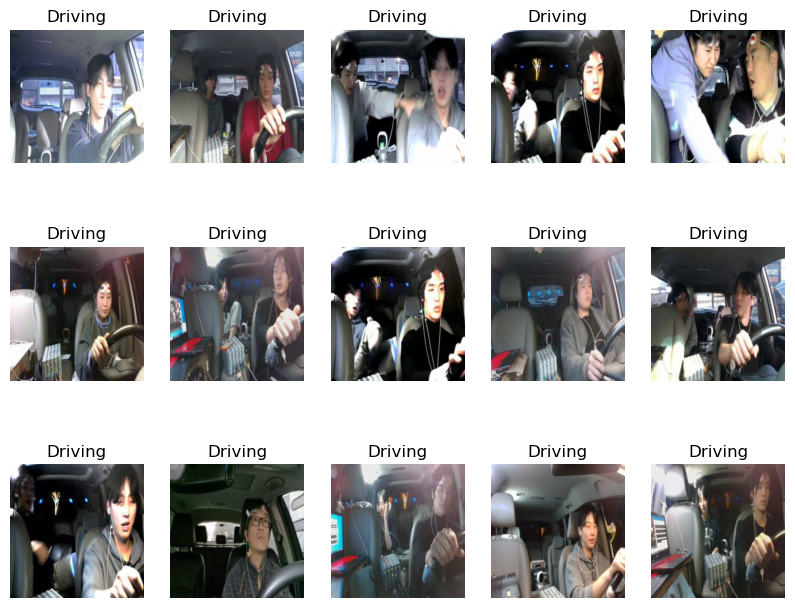

In [17]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory path
dir_path = '/home/dnlab/Data-B/data/main_data/train_cat_new/falling_asleep'

# Get a list of all the image files in the directory
img_files = [f for f in os.listdir(dir_path) if f.endswith('.jpg')]

# Select 10 random image files
random_imgs = random.sample(img_files, 15)

# Define the figure size and the number of rows and columns for the subplots
fig = plt.figure(figsize=(10, 8))
rows = 3
cols = 5

# Loop through the selected images and add them to the subplots
for i in range(len(random_imgs)):
    img_path = os.path.join(dir_path, random_imgs[i])
    img = Image.open(img_path)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img)
    ax.set_title("Falling asleep")
    ax.axis('off')
    

# Display the subplots
plt.show()


In [21]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory path
dir_path = '/home/dnlab/Data-B/data/main_data/train_cat_new'

# Get a list of all the image files in the directory
img_files = [f for f in os.listdir(dir_path) if f.endswith('.jpg')]

# Select 10 random image files
random_imgs = random.sample(img_files, 15)

# Define the figure size and the number of rows and columns for the subplots
fig = plt.figure(figsize=(10, 8))
rows = 3
cols = 5

# Loop through the selected images and add them to the subplots
for i in range(len(random_imgs)):
    img_path = os.path.join(dir_path, random_imgs[i])
    img = Image.open(img_path)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img)
    ax.set_title("Falling asleep")
    ax.axis('off')
    

# Display the subplots
plt.show()


ValueError: Sample larger than population or is negative

# Fist exp: 35 classes

/tmp/ipykernel_649975/532438492.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subdirs, rotation=90)


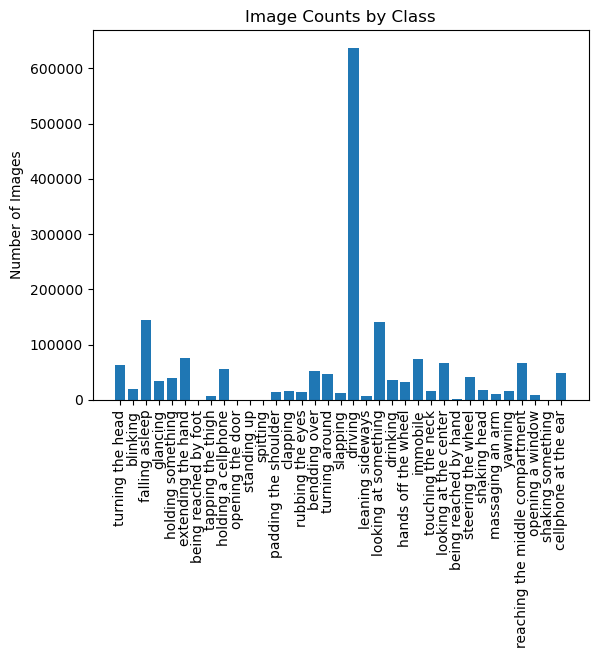

In [43]:
import os
import matplotlib.pyplot as plt

# set the directory containing the subdirectories with images
root_dir = '/home/dnlab/Data-B/data/main_data/train_ppr_cat'

# get the subdirectories
subdirs = os.listdir(root_dir)

# count the number of images in each subdirectory
counts = [len(os.listdir(os.path.join(root_dir, subdir))) for subdir in subdirs]

# create a bar chart to visualize the image counts
fig, ax = plt.subplots()
ax.bar(subdirs, counts)
ax.set_xticklabels(subdirs, rotation=90)
ax.set_ylabel('Number of Images')
ax.set_title('Image Counts by Class')
plt.show()


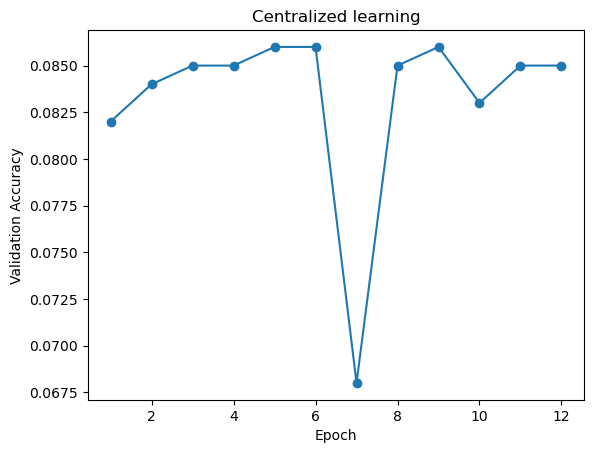

In [2]:
import matplotlib.pyplot as plt

# define the values for x and y axis
epochs = range(1, 13)
val_accuracy = [0.082, 0.084, 0.085, 0.085, 0.086, 0.086, 0.068, 0.085, 0.086, 0.083, 0.085, 0.085]

# create the plot
plt.plot(epochs, val_accuracy, marker='o')

# set the labels for the axes
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

# set the title for the plot
plt.title('Centralized learning')

# display the plot
plt.show()


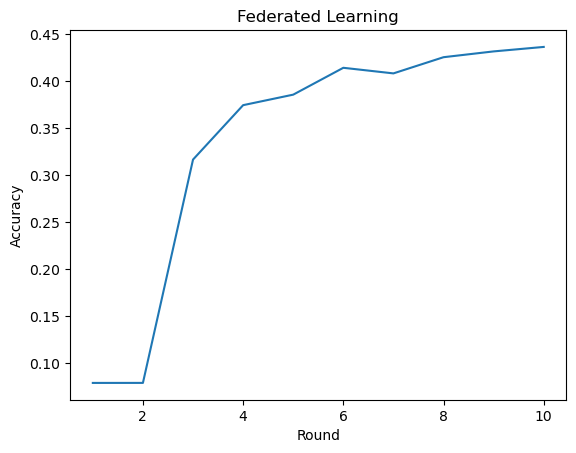

In [4]:
import matplotlib.pyplot as plt

metrics = {'accuracy': [(1, 0.0792336926310109), (2, 0.07925845491310282), (3, 0.31666931422939965), 
                        (4, 0.3745091134675169), (5, 0.38568678425450276), (6, 0.41423771390142006), 
                        (7, 0.40828485309464474), (8, 0.4254947192523431), (9, 0.43166053107411156), 
                        (10, 0.43642488146322717)]}

x = [entry[0] for entry in metrics['accuracy']]
y = [entry[1] for entry in metrics['accuracy']]

plt.plot(x, y)
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Federated Learning')
plt.show()


# Sec exp

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(train_dir, test_dir):
    # get the subdirectories (i.e., class labels) in the train directory
    train_subdirs = os.listdir(train_dir)

    # create empty lists to store the number of train and test samples for each class
    train_counts = []
    test_counts = []

    # loop through the subdirectories to count the number of samples in each class for train and test data
    for subdir in train_subdirs:
        train_count = len(os.listdir(os.path.join(train_dir, subdir)))
        test_count = len(os.listdir(os.path.join(test_dir, subdir)))
        train_counts.append(train_count)
        test_counts.append(test_count)

    # create a bar chart to visualize the sample counts for train and test data for each class
    fig, ax = plt.subplots()
    x = np.arange(len(train_subdirs))
    width = 0.35
    ax.bar(x - width/2, train_counts, width, label='Train')
    ax.bar(x + width/2, test_counts, width, label='Test')
    ax.set_xticks(x)
    ax.set_xticklabels(train_subdirs, rotation=90)
    ax.set_ylabel('Number of Samples')
    ax.set_title('Abnormal driving behavior img sample counts')
    ax.legend()
    plt.show()

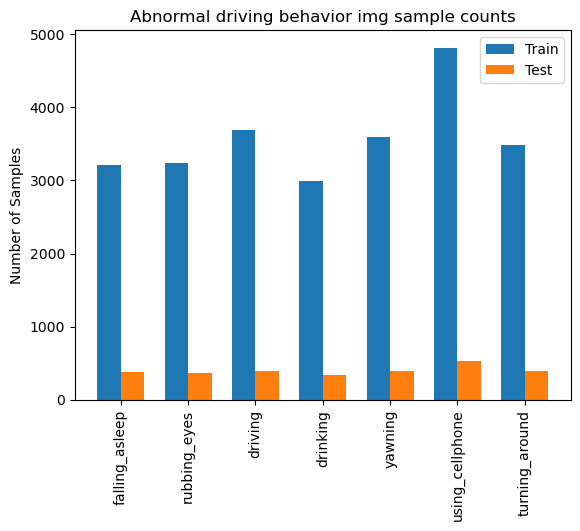

In [5]:
# define the directories for train and test data
train_dir = '/home/dnlab/Data-B/data/main_data/train_cat_new'
test_dir = '/home/dnlab/Data-B/data/main_data/val_cat_new'

plot_dataset(train_dir, test_dir)


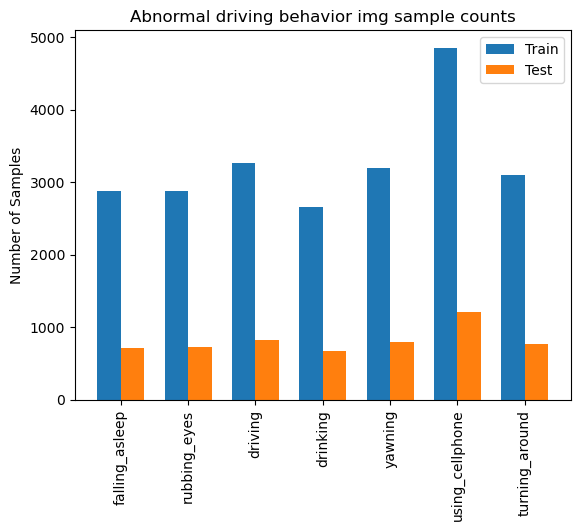

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

# define the directories for train and test data
train_dir = '/home/dnlab/Data-B/data/main_data/train_new'
test_dir = '/home/dnlab/Data-B/data/main_data/val_new'

plot_dataset(train_dir, test_dir)


## Training on resnet

In [8]:
import matplotlib.pyplot as plt

def cl_train_val_plot(train_loss, train_acc, val_loss, val_acc, epochs):
    # Plot train/val loss
    plt.plot(epochs, train_loss, label='Training loss', color='b', marker='o', linestyle='-', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation loss', color='orange', marker='s', linestyle='--', linewidth=2)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.show()

    # Plot train/val accuracy
    plt.plot(epochs, train_acc, label='Training accuracy', color='b', marker='o', linestyle='-', linewidth=2)
    plt.plot(epochs, val_acc, label='Validation accuracy', color='orange', marker='s', linestyle='--', linewidth=2)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.show()

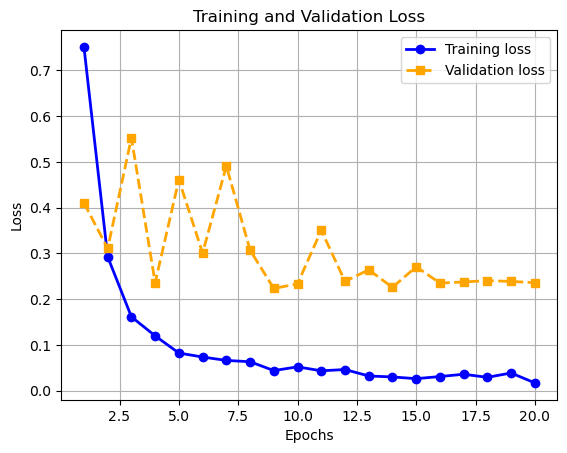

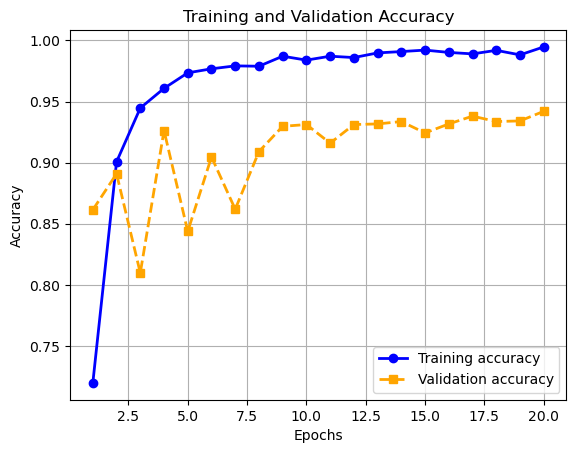

In [9]:


train_loss = [0.7515213950709007, 0.2926875785097925, 0.16138730070804147, 0.11972784350653996, 0.08215041738249008, 0.07345612327034645, 0.06604538597526628, 0.06318657834619702, 0.04384570528944604, 0.05198520647303769, 0.043330503709496426, 0.04615280478658737, 0.0320288151329623, 0.029909803298619527, 0.026110271854346178, 0.030804510698395966, 0.03581641595731882, 0.02906074284523503, 0.0385907506906781, 0.016832769896921222]
train_acc = [0.7198, 0.9007, 0.9447, 0.9608, 0.9735, 0.9768, 0.9792, 0.9789, 0.9871, 0.9839, 0.9871, 0.9860, 0.9898, 0.9909, 0.9921, 0.9902, 0.9890, 0.9919, 0.9882, 0.9947]
val_loss = [0.41058063943637535, 0.3108478185495187, 0.5526828024721908, 0.23593741368040355, 0.46113134281949897, 0.3008321469527573, 0.49128290480462056, 0.30708248661164816, 0.22333728671605968, 0.23347224035023828, 0.3506005769826146, 0.23894384446111872, 0.2641432867581841, 0.22573043947517135, 0.2708760317273118, 0.23515552081607893, 0.23754635085407827, 0.24049369166959877, 0.23872774419135112, 0.23607880014881744]
val_acc = [0.8614250614250615, 0.8909090909090909, 0.8098280098280098, 0.9262899262899262, 0.8437346437346437, 0.9046683046683047, 0.8619164619164619, 0.9090909090909091, 0.9297297297297298, 0.9312039312039312, 0.9159705159705159, 0.9312039312039312, 0.9316953316953317, 0.9336609336609336, 0.9243243243243243, 0.9316953316953317, 0.9380835380835381, 0.9336609336609336, 0.9341523341523341, 0.942014742014742]
epochs = range(1, len(train_loss)+1)

cl_train_val_plot(train_loss, train_acc, val_loss, val_acc, epochs)


## ResNet 34

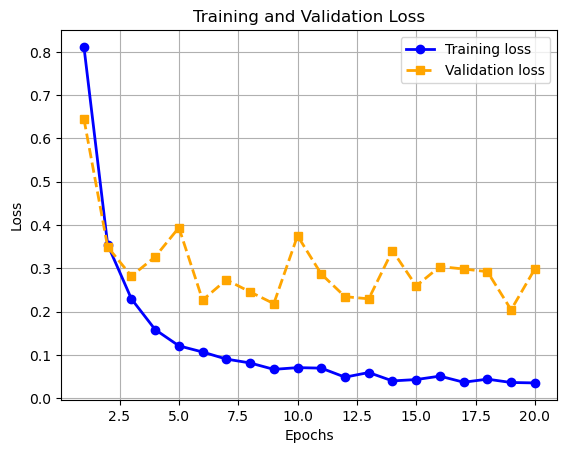

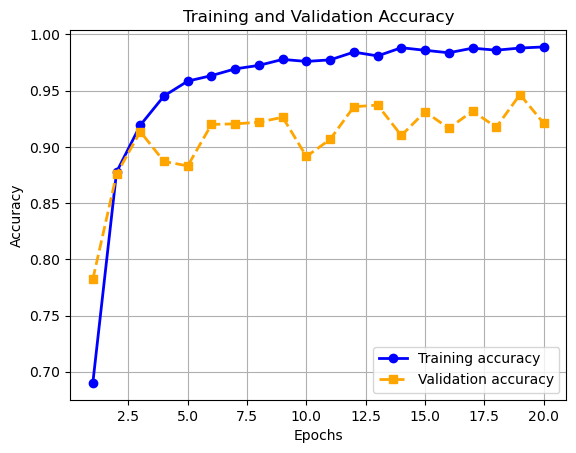

In [10]:
import numpy as np
import matplotlib.pyplot as plt

train_loss = np.array([0.8114005395576279, 0.3546033745831262, 0.22950488694588309, 0.1586276783652093, 0.12109904156699908, 0.10686515013381237, 0.09051741409092579, 0.08158974041499407, 0.06677938691873975, 0.0707735120892109, 0.06962192283782892, 0.048771125596934875, 0.05949014859697135, 0.040112863249462165, 0.0432480191934677, 0.051151816639271756, 0.03705979975580601, 0.04413503824724196, 0.036462439710347176, 0.03546286482076072])
train_acc = np.array([0.6901, 0.8776, 0.9192, 0.9452, 0.9584, 0.9633, 0.9693, 0.9724, 0.9777, 0.9759, 0.9773, 0.9842, 0.9808, 0.9881, 0.9858, 0.9836, 0.9877, 0.9859, 0.9878, 0.9888])
val_loss = np.array([0.6446268051731749, 0.34943162032163855, 0.28212516652001796, 0.3266824553479637, 0.3940889577392568, 0.22669841933839052, 0.2736768165768808, 0.24570573056234934, 0.21855507201563285, 0.3752194846634893, 0.2868987727122203, 0.23468262376889015, 0.22967039131674483, 0.3409927113380089, 0.25948269904931465, 0.304229680536082, 0.2985627765337995, 0.29241273163063397, 0.20431188574543135, 0.2987979929327427])
val_acc = np.array([0.7823095823095824, 0.8756756756756757, 0.9135135135135135, 0.8869778869778869, 0.8830466830466831, 0.9199017199017199, 0.9203931203931204, 0.9218673218673219, 0.9262899262899262, 0.8914004914004914, 0.9066339066339066, 0.9356265356265356, 0.937100737100737, 0.9100737100737101, 0.9312039312039312, 0.9164619164619164, 0.9316953316953317, 0.9174447174447175, 0.9464373464373464, 0.9208845208845209])

epochs = range(1, len(train_loss)+1)

cl_train_val_plot(train_loss, train_acc, val_loss, val_acc, epochs)



## ResNet 34 FL


### FL on 5 classes, 32 batch, 20 rounds

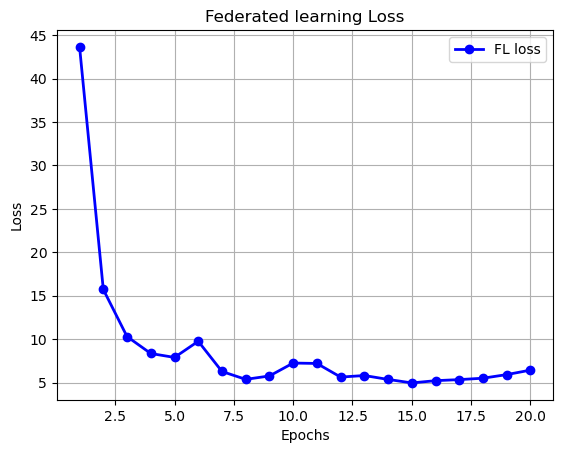

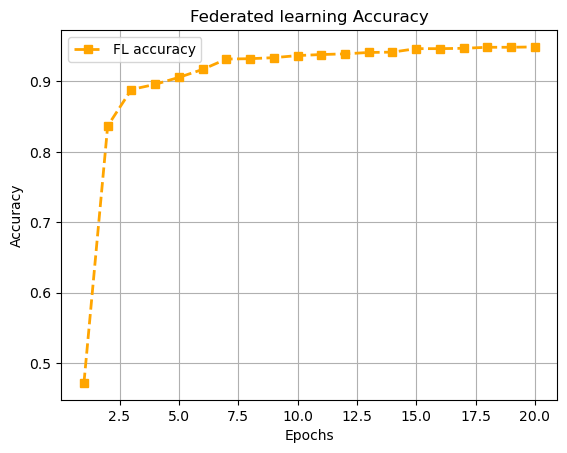

In [10]:
acc_results = {'accuracy': [(1, 0.471976401179941), (2, 0.8367748279252704), (3, 0.8883972468043264), (4, 0.9056047197640118), (5, 0.9169124877089478), (6, 0.895771878072763), (7, 0.9336283185840708), (8, 0.9410029498525073), (9, 0.9365781710914455), (10, 0.9321533923303835), (11, 0.9316617502458211), (12, 0.9414945919370699), (13, 0.9390363815142576), (14, 0.948377581120944), (15, 0.9469026548672567), (16, 0.948377581120944), (17, 0.9464110127826942), (18, 0.9488692232055064), (19, 0.9464110127826942), (20, 0.9380530973451328)]}
loss_results = [(1, 43.64590263366699), (2, 15.71291208267212), (3, 10.293064594268799), (4, 8.342605352401733), (5, 7.890272378921509), (6, 9.750692367553711), (7, 6.272230863571167), (8, 5.364369869232178), (9, 5.755553245544434), (10, 7.242149353027344), (11, 7.1968748569488525), (12, 5.626222133636475), (13, 5.806906700134277), (14, 5.356373071670532), (15, 4.954075574874878), (16, 5.212731838226318), (17, 5.335448980331421), (18, 5.497867107391357), (19, 5.913508653640747), (20, 6.429081678390503)]

acc = sorted([n[1] for n in acc_results['accuracy']])
loss = [n[1] for n in loss_results]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label='FL loss', color='b', marker='o', linestyle='-', linewidth=2)
plt.title('Federated learning Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


plt.plot(epochs, acc, label='FL accuracy', color='orange', marker='s', linestyle='--', linewidth=2)
plt.title('Federated learning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [11]:
import matplotlib.pyplot as plt
def cl_vs_fl_plot(fl_acc_results, fl_loss_results, val_loss, val_acc):
    acc_fl = sorted([n[1] for n in fl_acc_results['accuracy']])
    loss_fl = [n[1] for n in fl_loss_results]
    epochs = range(1, len(loss_fl)+1)
    plt.plot(epochs, loss_fl, label='FL loss', color='b', marker='o', linestyle='-', linewidth=2)
    plt.plot(epochs, val_loss, label='CL loss', color='g', marker='o', linestyle='-', linewidth=2)
    plt.title('Centralized vs Federated learning Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()


    plt.plot(epochs, acc_fl, label='FL accuracy', color='orange', marker='s', linestyle='--', linewidth=2)
    plt.plot(epochs, val_acc, label='Cl accuracy', color='r', marker='o', linestyle='-', linewidth=2)
    plt.title('Federated learning Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

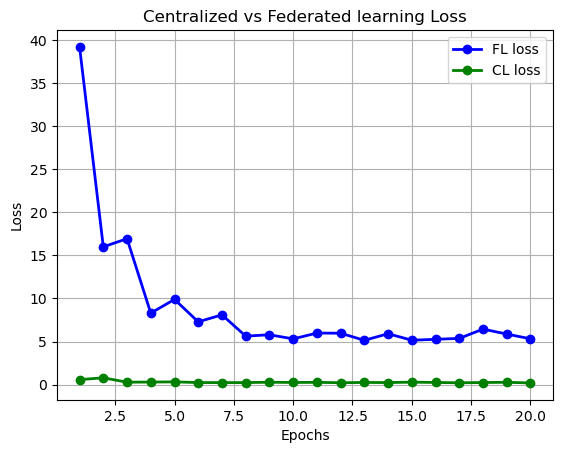

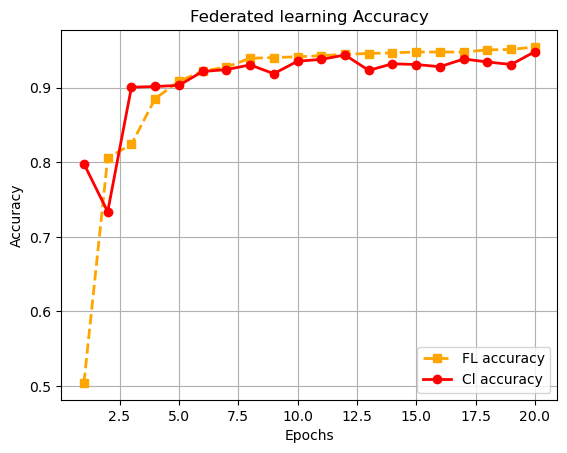

In [13]:
fl_acc_results = {'accuracy': [(1, 0.5039331366764995), (2, 0.8058013765978368), (3, 0.823992133726647), (4, 0.9085545722713865), (5, 0.8854473942969519), (6, 0.9277286135693216), (7, 0.9223205506391348), (8, 0.9414945919370699), (9, 0.9429695181907571), (10, 0.9459193706981318), (11, 0.9449360865290068), (12, 0.9405113077679449), (13, 0.9478859390363815), (14, 0.9469026548672567), (15, 0.9478859390363815), (16, 0.9547689282202556), (17, 0.9513274336283186), (18, 0.93952802359882), (19, 0.9478859390363815), (20, 0.9508357915437562)]}
fl_loss_results = [(1, 39.19762992858887), (2, 15.992528915405273), (3, 16.936655044555664), (4, 8.300533771514893), (5, 9.892040252685547), (6, 7.288369417190552), (7, 8.101266145706177), (8, 5.627584457397461), (9, 5.788033723831177), (10, 5.310553550720215), (11, 5.983434200286865), (12, 5.967586040496826), (13, 5.142686367034912), (14, 5.907345771789551), (15, 5.154421806335449), (16, 5.258818626403809), (17, 5.366408109664917), (18, 6.441759824752808), (19, 5.869247913360596), (20, 5.316133260726929)]
val_loss = [0.5816690958454274, 0.7894021144020371, 0.2820303006319591, 0.2977058710005167, 0.31873497885226243, 0.23940439906937172, 0.23355512917896704, 0.23584602635753527, 0.27604896666866807, 0.24962733570782802, 0.2633891122214642, 0.21995134716968323, 0.2520321687444138, 0.2384877561656964, 0.2857282372416421, 0.2493804193572941, 0.21302542471708819, 0.24406501688831383, 0.26913439680899387, 0.19711536332044233]
val_acc = [0.7979351032448377, 0.7335299901671584, 0.9006882989183874, 0.9016715830875123, 0.9031465093411996, 0.9218289085545722, 0.9242871189773845, 0.9306784660766961, 0.9188790560471977, 0.9355948869223205, 0.9380530973451328, 0.943952802359882, 0.9233038348082596, 0.9321533923303835, 0.9311701081612586, 0.928220255653884, 0.9385447394296952, 0.9346116027531957, 0.9311701081612586, 0.948377581120944] 

cl_vs_fl_plot(fl_acc_results, fl_loss_results, val_loss, val_acc)

### FL with 7 classes, 50 epoch, 32 batch size

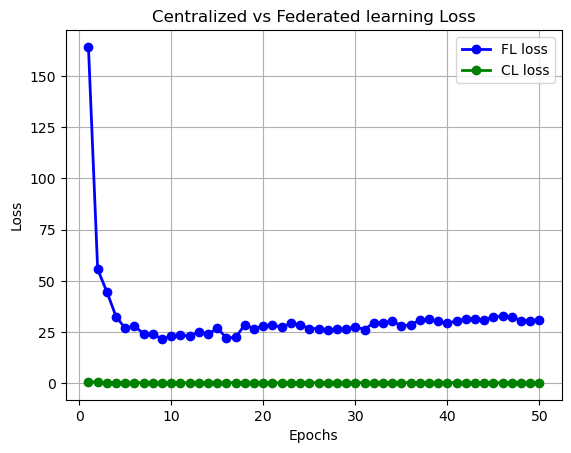

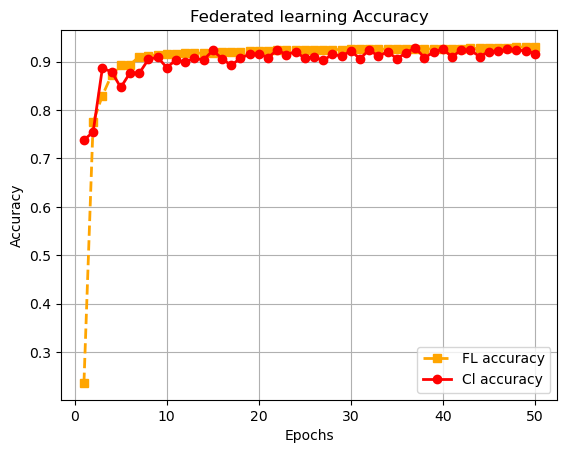

In [17]:
# 20% test size
import matplotlib.pyplot as plt

loss_results = [(1, 164.16344451904297), (2, 55.74611282348633), (3, 44.724674224853516), (4, 32.65431880950928), (5, 26.864296913146973), (6, 28.05723476409912), (7, 24.241348266601562), (8, 23.95351219177246), (9, 21.85292339324951), (10, 22.930054664611816), (11, 23.82760715484619), (12, 23.020959854125977), (13, 25.25196075439453), (14, 24.09061336517334), (15, 26.895511627197266), (16, 22.347643852233887), (17, 22.45251178741455), (18, 28.758959770202637), (19, 26.624515533447266), (20, 28.025922775268555), (21, 28.31213092803955), (22, 27.62432289123535), (23, 29.303357124328613), (24, 28.706819534301758), (25, 26.766407012939453), (26, 26.802898406982422), (27, 26.20942974090576), (28, 26.52730369567871), (29, 26.469573974609375), (30, 27.757614135742188), (31, 26.254286766052246), (32, 29.69929790496826), (33, 29.479013442993164), (34, 30.593961715698242), (35, 28.058820724487305), (36, 28.673635482788086), (37, 30.841936111450195), (38, 31.21319007873535), (39, 30.485260009765625), (40, 29.280900955200195), (41, 30.597071647644043), (42, 31.293827056884766), (43, 31.352831840515137), (44, 31.119853019714355), (45, 32.41410827636719), (46, 32.922231674194336), (47, 32.56974220275879), (48, 30.548290252685547), (49, 30.67673110961914), (50, 31.153170585632324)]
acc_results = {'accuracy': [(1, 0.23624255169996494), (2, 0.7749737118822292), (3, 0.8296529968454258), (4, 0.8724150017525412), (5, 0.8936207500876271), (6, 0.8929197336137399), (7, 0.9116719242902208), (8, 0.9102698913424465), (9, 0.922011917280056), (10, 0.9181563266736769), (11, 0.9157027690150719), (12, 0.9185068349106204), (13, 0.9146512443042412), (14, 0.9199088678583947), (15, 0.919558359621451), (16, 0.9260427620049071), (17, 0.926919032597266), (18, 0.9169295478443743), (19, 0.9272695408342096), (20, 0.9234139502278303), (21, 0.9197336137399229), (22, 0.9232386961093586), (23, 0.9169295478443743), (24, 0.9235892043463021), (25, 0.9241149667017174), (26, 0.9260427620049071), (27, 0.9227129337539433), (28, 0.9249912372940764), (29, 0.9246407290571328), (30, 0.9251664914125481), (31, 0.9235892043463021), (32, 0.9263932702418507), (33, 0.9260427620049071), (34, 0.9302488608482299), (35, 0.9160532772520155), (36, 0.9284963196635121), (37, 0.9272695408342096), (38, 0.92534174553102), (39, 0.9284963196635121), (40, 0.9279705573080967), (41, 0.9302488608482299), (42, 0.926218016123379), (43, 0.92534174553102), (44, 0.9221871713985279), (45, 0.9260427620049071), (46, 0.9304241149667017), (47, 0.9263932702418507), (48, 0.9255169996494917), (49, 0.9249912372940764), (50, 0.926218016123379)]}
val_loss = [0.7593699105333682, 0.7037133510515885, 0.3408186855425475, 0.3619935766666316, 0.47047914343871605, 0.3765097396219326, 0.38785197215054207, 0.339026634016474, 0.27261936859560704, 0.3993558217287795, 0.35264393070835404, 0.31952283118701735, 0.37335629612923626, 0.3487495153153886, 0.3028214964953052, 0.34575130865747705, 0.42144942500152494, 0.45835852390185683, 0.3491518408201559, 0.35035604829873873, 0.37943337448883013, 0.3485135247960434, 0.3424258604153751, 0.365569153369806, 0.41181284710587507, 0.44863889609026264, 0.3990138909740793, 0.3416517294245527, 0.3829210874480434, 0.37246372419269086, 0.44020331535478474, 0.3669844941046985, 0.384535344820318, 0.46222154182037, 0.4517074098855802, 0.3993886257081288, 0.3566717427482877, 0.4589111928292739, 0.39543452370699345, 0.3975079758127096, 0.414019137963232, 0.36280978996176455, 0.38380111991236976, 0.41643412038494626, 0.37458386011447903, 0.36163991668659723, 0.3813553618725391, 0.44303494902526563, 0.38625038652015814, 0.4058970583907744]
val_acc = [0.7379950928846828, 0.7548194882579741, 0.8860848229933403, 0.8794251664914126, 0.846652646337189, 0.8767963547143358, 0.8757448300035051, 0.9046617595513494, 0.9093936207500877, 0.8876621100595864, 0.9036102348405187, 0.8992288818787242, 0.9071153172099544, 0.903434980722047, 0.9232386961093586, 0.9064143007360673, 0.892043463021381, 0.9072905713284262, 0.9151770066596565, 0.9160532772520155, 0.9085173501577287, 0.923764458464774, 0.9146512443042412, 0.9206098843322819, 0.9069400630914827, 0.909919383105503, 0.9023834560112163, 0.9151770066596565, 0.9114966701717491, 0.9221871713985279, 0.9060637924991237, 0.9246407290571328, 0.9107956536978619, 0.9207851384507536, 0.9060637924991237, 0.917981072555205, 0.9286715737819838, 0.9081668419207851, 0.9193831055029793, 0.9267437784787943, 0.9092183666316158, 0.9248159831756047, 0.9234139502278303, 0.9106203995793901, 0.9206098843322819, 0.9216614090431126, 0.9251664914125481, 0.9232386961093586, 0.922888187872415, 0.9165790396074308] 

cl_vs_fl_plot(acc_results, loss_results, val_loss, val_acc)

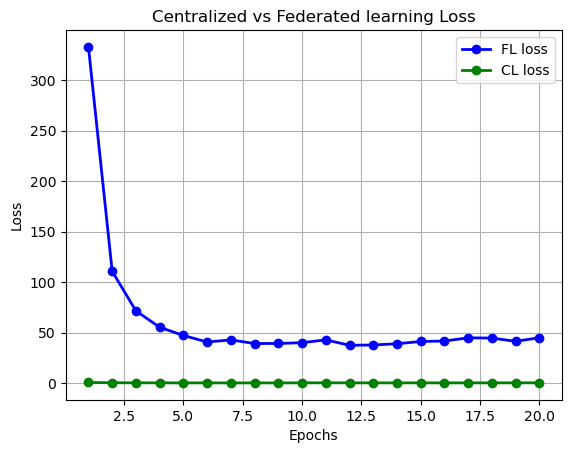

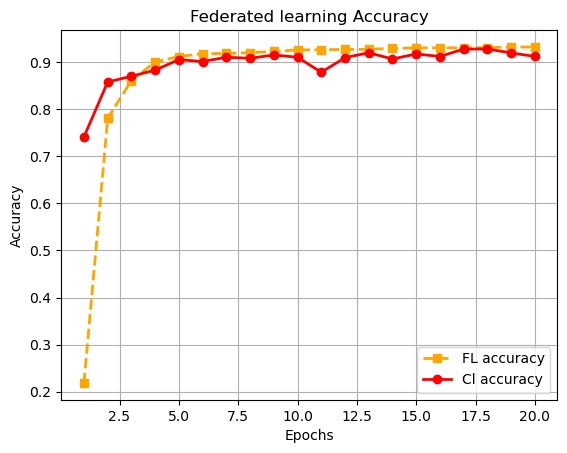

In [22]:
import matplotlib.pyplot as plt

# 20% test
loss_results = [(1, 332.8220672607422), (2, 110.74658584594727), (3, 71.59509658813477), (4, 55.32701110839844), (5, 47.24570083618164), (6, 40.75043296813965), (7, 42.82903289794922), (8, 39.2502498626709), (9, 39.295461654663086), (10, 40.05627632141113), (11, 42.88920211791992), (12, 37.49040222167969), (13, 37.792585372924805), (14, 39.025014877319336), (15, 41.26786231994629), (16, 41.71949005126953), (17, 44.86638641357422), (18, 44.64420127868652), (19, 41.40434455871582), (20, 44.98241424560547)] 
acc_results = {'accuracy': [(1, 0.21871713985278654), (2, 0.7804065895548545), (3, 0.8604977216964599), (4, 0.8999298983526113), (5, 0.9114966701717491), (6, 0.917981072555205), (7, 0.9174553101997897), (8, 0.9223624255169997), (9, 0.9260427620049071), (10, 0.92534174553102), (11, 0.919558359621451), (12, 0.9297230984928145), (13, 0.931826147914476), (14, 0.9298983526112864), (15, 0.9298983526112864), (16, 0.9288468279004557), (17, 0.9267437784787943), (18, 0.9304241149667017), (19, 0.9263932702418507), (20, 0.9314756396775324)]}
val_loss = [0.7014067443700752, 0.43637946350317375, 0.36037444563061444, 0.3313117605418894, 0.2919177723498335, 0.2977744495615094, 0.24892672846589212, 0.28766002310385247, 0.2597006297824952, 0.32129185318645803, 0.3891834741189494, 0.30990468904722646, 0.29426011471448504, 0.31170176936130656, 0.32304970252361204, 0.2913061111204021, 0.2968790060158929, 0.31565456883521215, 0.3244321982953949, 0.3568858672675138]
val_acc = [0.7407991587802313, 0.8573431475639678, 0.8696109358569927, 0.8825797406239047, 0.9048370136698213, 0.9008061689449702, 0.909919383105503, 0.9076410795653698, 0.9146512443042412, 0.909919383105503, 0.8780231335436383, 0.9090431125131441, 0.9193831055029793, 0.9062390466175955, 0.9169295478443743, 0.9114966701717491, 0.9272695408342096, 0.9274447949526814, 0.9190325972660357, 0.9116719242902208]

cl_vs_fl_plot(acc_results, loss_results, val_loss, val_acc)

### FL with 7 classes, 20 epoch, 32 batch size

The reason for the lower accuracy of CL as compared to FL is that the validate_loader.dataset method in the train.py code for CL needs to be called during the calculation of accuracy. This method loads the entire dataset, which is necessary for accurate results.

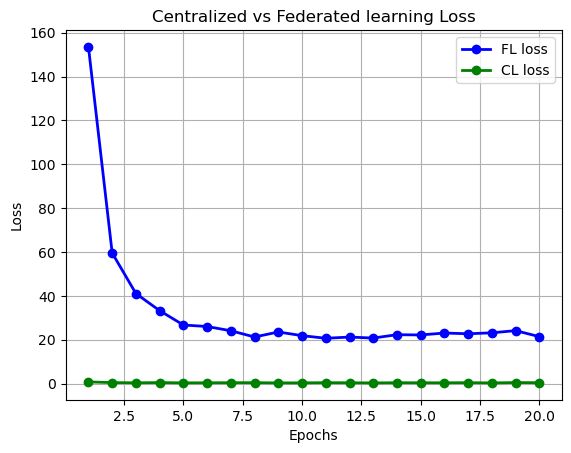

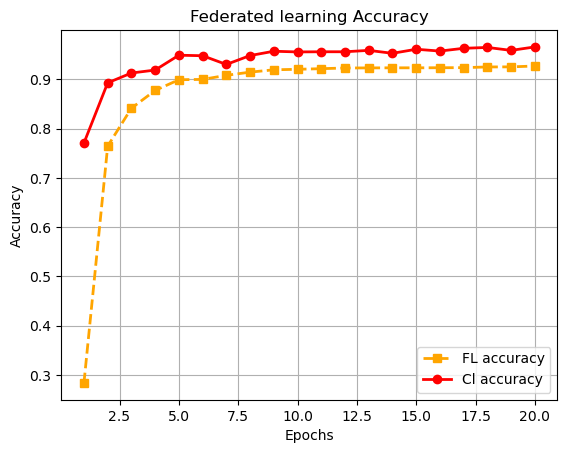

In [25]:
import matplotlib.pyplot as plt

# 20% test
loss_results = [(1, 153.50321197509766), (2, 59.534921646118164), (3, 41.0496768951416), (4, 33.24302959442139), (5, 26.699231147766113), (6, 26.01151752471924), (7, 24.076370239257812), (8, 21.23068332672119), (9, 23.51512050628662), (10, 21.842992782592773), (11, 20.650961875915527), (12, 21.196276664733887), (13, 20.749189376831055), (14, 22.27508544921875), (15, 22.165099143981934), (16, 23.034259796142578), (17, 22.708853721618652), (18, 23.134933471679688), (19, 24.1338472366333), (20, 21.38523292541504)]
acc_results = {'accuracy': [(1, 0.28391167192429023), (2, 0.7644584647739222), (3, 0.8413950227830354), (4, 0.8774973711882229), (5, 0.8992288818787242), (6, 0.8999298983526113), (7, 0.9081668419207851), (8, 0.92043463021381), (9, 0.9146512443042412), (10, 0.9193831055029793), (11, 0.9230634419908867), (12, 0.9216614090431126), (13, 0.9251664914125481), (14, 0.923764458464774), (15, 0.92534174553102), (16, 0.9234139502278303), (17, 0.9232386961093586), (18, 0.9235892043463021), (19, 0.9234139502278303), (20, 0.9270942867157378)]}
val_loss = [0.7508941834041973, 0.43067751813864635, 0.34419337861557286, 0.436537681637181, 0.3115357452266662, 0.3380256662287809, 0.3848229894788016, 0.38855492352688, 0.29780041093583515, 0.30905195859883744, 0.39795206399065536, 0.3490716948053652, 0.28786744219082694, 0.37455116386528403, 0.3498538095564428, 0.3405658047305959, 0.39734578120769887, 0.28693536128620206, 0.44832590950590206, 0.3819097103234676]
val_acc = [0.7707676130389064, 0.8929197336137399, 0.9128987031195233, 0.918857343147564, 0.9490010515247108, 0.9479495268138801, 0.9302488608482299, 0.9483000350508237, 0.9570627409744129, 0.9556607080266386, 0.9560112162635822, 0.9560112162635822, 0.9588152821591307, 0.9528566421310901, 0.961093585699264, 0.9574132492113565, 0.9630213810024536, 0.9647739221871714, 0.9588152821591307, 0.9658254468980021] 

cl_vs_fl_plot(acc_results, loss_results, val_loss, val_acc)

## Training on mobilenet

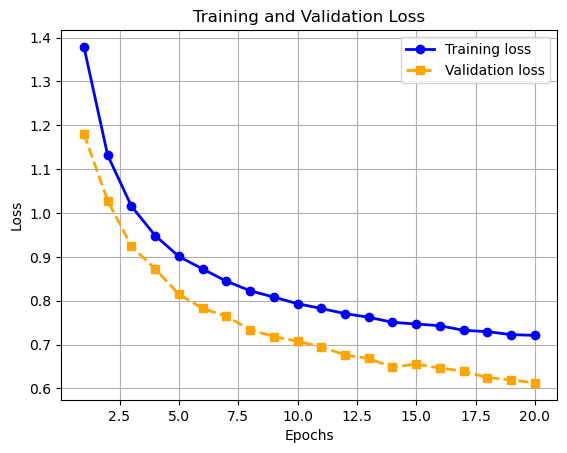

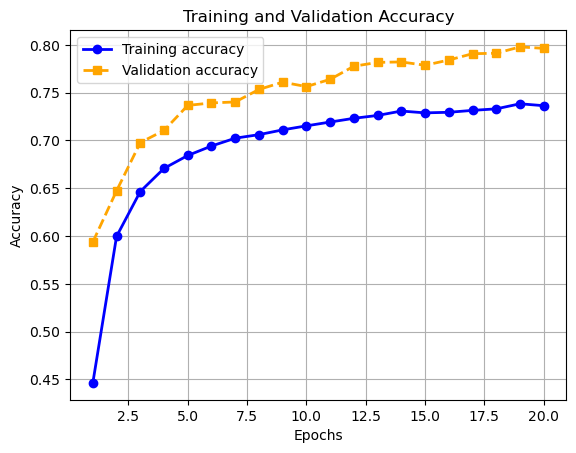

In [9]:
import matplotlib.pyplot as plt

train_loss = [1.3785618196719538, 1.1316051287625832, 1.015480618417999, 0.9484968273727982, 0.900808411090252, 0.8722274935224489, 0.8445945762137257, 0.8227146030838948, 0.808192850578399, 0.7931482043426084, 0.7822337490646086, 0.7706210214835205, 0.7621595887385137, 0.7507711601635766, 0.746796995716751, 0.7429094630994915, 0.732414634454818, 0.7294737357626516, 0.7226038010137211, 0.720963427839666]
train_acc = [0.4463, 0.5996, 0.6466, 0.6708, 0.6843, 0.6942, 0.7024, 0.7061, 0.7111, 0.7153, 0.7193, 0.7232, 0.7262, 0.7308, 0.7289, 0.7295, 0.7315, 0.7331, 0.7384, 0.7364]
val_loss = [1.180123221489691, 1.0282394429368358, 0.9241475919562001, 0.8723607044066152, 0.8149789230477426, 0.7822403013706207, 0.7644798407150853, 0.7339512205892994, 0.7182525184846693, 0.7073902043123399, 0.6949884430054696, 0.6760316683400062, 0.6683082840135021, 0.6484060607129528, 0.6553378847818221, 0.6464324168139889, 0.6391493322387818, 0.6247433822962546, 0.6194538269792834, 0.6125241554071826]
val_acc = [0.5937, 0.6473, 0.6978, 0.7105, 0.7367, 0.7393, 0.7403, 0.7534, 0.7610, 0.7564, 0.7640, 0.7777, 0.7817, 0.7822, 0.7787, 0.7842, 0.7908, 0.7913, 0.7979, 0.7964]

epochs = range(1, len(train_loss)+1)

# Plot train/val loss
plt.plot(epochs, train_loss, label='Training loss', color='b', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs, val_loss, label='Validation loss', color='orange', marker='s', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

# Plot train/val accuracy
plt.plot(epochs, train_acc, label='Training accuracy', color='b', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs, val_acc, label='Validation accuracy', color='orange', marker='s', linestyle='--', linewidth=2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()